In [249]:
import numpy as np
import matplotlib.pyplot as plt

In [250]:
rawdata = np.loadtxt('100Particle.csv',delimiter=',')


In [251]:
data = rawdata[::, :] #only every 100th time point (No need for every 100th now)
t_total = np.shape(data)[0]
np.shape(data) #first number is time, second number is position/momenta/energies

(10000, 800)

In [252]:
N = 100 #number of particles
N*3*2+N+N #number of columns 

800

In [253]:
posMom = data[:,:-200]
#energies = data[:,600:]
pos = posMom[:,:-300]
mom = posMom[:,300:]
Ekin = data[:,600:-100]
Epot = data[:,700:]


In [254]:
t_c = 0 #cutoff
t = t_total-t_c #actual time for positions and momenta only

In [255]:
x_i = pos[t_c:,::3]
y_i = pos[t_c:,1::3]
z_i = pos[t_c:,2::3]
px_i = mom[t_c:,::3]
py_i = mom[t_c:,1::3]
pz_i = mom[t_c:,2::3]


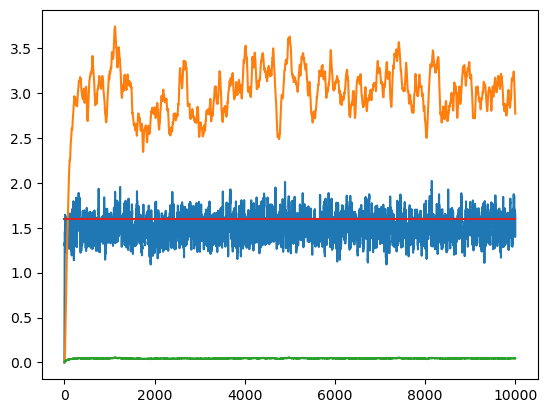

In [256]:
Ekin_avg = np.mean(Ekin, axis = 1)
Epot_avg = np.mean(Epot, axis = 1)
plt.plot(Ekin_avg)
plt.plot(Epot_avg)
plt.plot((Ekin_avg+Epot_avg)/100)
plt.plot([0,10000], [2*np.sqrt(2/np.pi), 2*np.sqrt(2/np.pi)])
plt.show()

In [257]:
#making one big array for the position and momenta so that the histogram function works properly
X = np.concatenate((x_i,y_i,z_i), axis = None)
PX = np.concatenate((px_i,py_i,pz_i), axis = None)
"""for i in range(t_total-t_c):
    X = np.concatenate((X,x_i[i,:]))
    X = np.concatenate((X,y_i[i,:]))
    X = np.concatenate((X,z_i[i,:]))
    
    PX = np.concatenate((PX,px_i[i,:]))
    PX = np.concatenate((PX,py_i[i,:]))
    PX = np.concatenate((PX,pz_i[i,:]))
"""

'for i in range(t_total-t_c):\n    X = np.concatenate((X,x_i[i,:]))\n    X = np.concatenate((X,y_i[i,:]))\n    X = np.concatenate((X,z_i[i,:]))\n    \n    PX = np.concatenate((PX,px_i[i,:]))\n    PX = np.concatenate((PX,py_i[i,:]))\n    PX = np.concatenate((PX,pz_i[i,:]))\n'

In [258]:
def gaussian(x, mu = 0, sigma = 1):
    f = np.sqrt(1/(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2)))
    return(f)

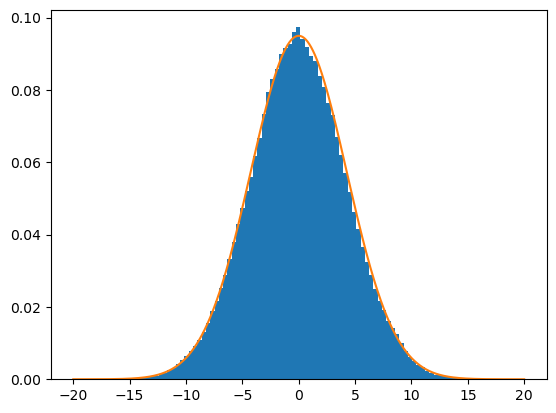

In [259]:
xx = np.linspace(-20,20, 1000)
plt.hist(X, bins = 100, density = True)
plt.plot(xx, gaussian(xx, 0, 3)/1.4) # this is not a proper fitting yet

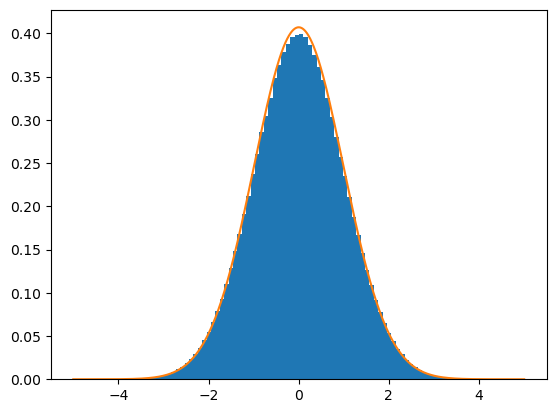

In [260]:
pxx = np.linspace(-5,5, 1000)
plt.hist(PX, bins = 100, density = True)
plt.plot(pxx, gaussian(pxx, 0, 0.7)/1.4)

##### For $s=0$

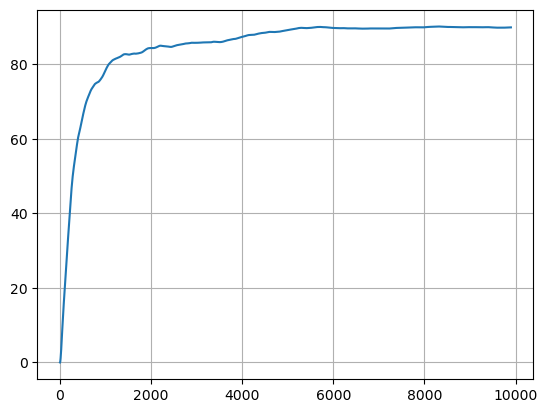

In [261]:
s = 100


r2 = (x_i[s:]-x_i[s])**2 + (y_i[s:]-y_i[s])**2 + (z_i[s:]-z_i[s])**2

r2_average = np.mean(r2, axis=1)


r2_time_average = np.zeros_like(r2_average)



sum = 0
for i in range(len(r2_time_average)):
    sum += (r2_average[i])
    r2_time_average[i] = sum/(i+1)


plt.plot(r2_time_average)
plt.grid()

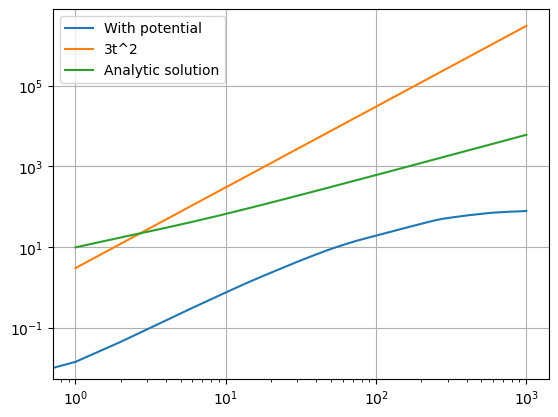

In [262]:
x_val = np.linspace(1, 1000, 1000)

y_val = 3*x_val**2 

r2_analytic = 6*x_val + 6*(1-np.exp(-x_val))


plt.plot(r2_time_average[:1000], label = "With potential")
plt.plot(x_val, y_val, label = "3t^2")
plt.plot(x_val, r2_analytic, label = "Analytic solution")
plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-4, 1e4)
plt.legend()
plt.grid()

In [263]:
def r_squ(t, gamma = 1, m = 1, epsilon = 1):
    return(6*epsilon/(m*gamma)*t-6*epsilon/(m*gamma**2)*(1-np.exp(-gamma*t)))


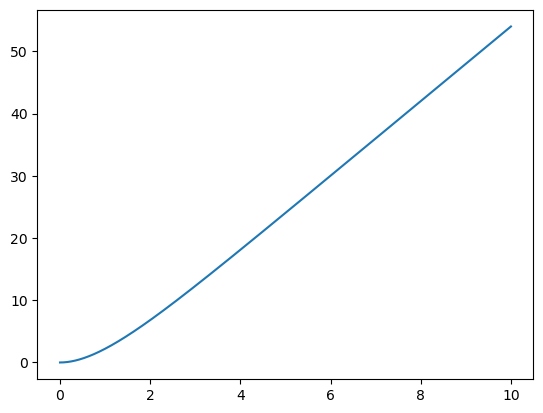

In [264]:
plt.plot(tt, r_squ(tt))

In [265]:
2*np.log(3)

2.1972245773362196

In [266]:
np.shape(r2_average)

(9900,)